In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('C:/Users/EGBUNA/Jiji_web_data/jiji_house_data(cleaned).csv')
data.head()

,price,location,house_type,rooms,bathrooms,rent_duration,estate name,condition,furnishing,facilities,area,dishwasher,prepaid_meter,dinning_area,air_conditioning,chandelier,state,estate
0,450000,"enugu, enugu / enugu state",Apartment,1,2,per annum,good is good,Newly Built,Furnished,"balcony,chandelier,24 hours electricity,dishwa...",semi_urban,yes,yes,yes,no,yes,enugu,no
1,300000,"anambra, awka",Apartment,1,2,per annum,ifite awka,Newly Built,Unfurnished,"24 hours electricity,dining area,balcony,kitch...",rural,no,no,yes,no,no,anambra,no
2,200000,"ogun, ifo",Studio Apartment,1,1,per annum,ifedayo,Fairly Used,Unfurnished,"pre paid meter,tiled floor,dishwasher,kitchen ...",rural,yes,yes,no,no,no,ogun,no
3,1000000,"lagos, ajah",Duplex,1,2,per quarter,"lekki scheme 2,abraham adesanya ajah",Newly Built,Semi-Furnished,"balcony,chandelier,dining area,wardrobe,wi-fi,...",semi_urban,yes,yes,yes,no,yes,lagos,no
4,300000,marian,Apartment,1,2,per quarter,smart property,Fairly Used,Unfurnished,"balcony,24 hours electricity,kitchen shelf,din...",rural,no,no,yes,no,no,lagos,no


In [3]:
data.location.unique()

array(['enugu, enugu / enugu state', 'anambra, awka', 'ogun, ifo',
       'lagos, ajah', 'marian', 'arthur eze avenue awka.',
       'ogun, obafemi-owode', 'alakahia, obio / akpor lga. rivers state',
       'ifite awka', 'nza street , gra enugu', 'lagos, isolo, ago palace',
       'kaduna, kaduna / kaduna state', 'rivers, obio-akpor',
       'osun, osogbo', 'oyo, ido', 'atimbo', 'satellite town',
       'atimbo off nyangasang', 'lagos, lekki, lekki phase 1',
       'lagos, lekki',
       'kosta hostel, close to nnamdi azikiwe university awka',
       'ifite awka anambra state',
       'book foundation ifite awka anambra state',
       'nasarawa, karu-nasarawa', 'lagos, ikoyi', 'lagos, yaba',
       'oyo, oluyole', 'elewuro', 'araromi akesan igando',
       'lagos, ibeju, bogije', 'lagos, ikoyi, osborne foreshore estate',
       'lagos, lekki, ikota', 'lagos, ajah, sangotedo',
       'lagos, yaba, akoka', 'kaduna, chikun',
       'ajegunle area off asa dam', 'abuja, lugbe district', 'is

In [4]:
data.columns

Index(['price', 'location', 'house_type', 'rooms', 'bathrooms',
       'rent_duration', 'estate name', 'condition', 'furnishing', 'facilities',
       'area', 'dishwasher', 'prepaid_meter', 'dinning_area',
       'air_conditioning', 'chandelier', 'state', 'estate'],
      dtype='object')

In [5]:
data.house_type.value_counts()

Duplex               253
Apartment            177
Block of Flats       139
Bungalow              47
House                 16
Studio Apartment      10
Townhouse/Terrace      9
Mini Flat              8
Room & Parlour         4
Penthouse              3
Shared Apartment       3
Maisonette             3
Flat                   1
Farm House             1
Condo                  1
Townhouse              1
Name: house_type, dtype: int64

## Feature engineering of columns

In [6]:
## want to put similar type of house in one category to reduce outliers
copy = data.copy()
penthouse_condo = ['Penthouse', 'Condo']

flats = ['Block of Flats', 'Mini Flat', 'Flat']

apartment = ['Apartment',  'Shared Apartment', 'Studio Apartment']

house = []

for i in range(len(data.house_type)):
    if data.house_type.iloc[i] in penthouse_condo:
        data.house_type.iloc[i] = 'penthouse/condo'
    elif data.house_type.iloc[i] in flats:
        data.house_type.iloc[i] = 'flats'
    elif data.house_type.iloc[i] in apartment:
        data.house_type.iloc[i] = 'apartment'
    else:
        data.house_type.iloc[i] = 'house'
data.house_type.value_counts()

house              334
apartment          190
flats              148
penthouse/condo      4
Name: house_type, dtype: int64

<AxesSubplot:xlabel='house_type'>

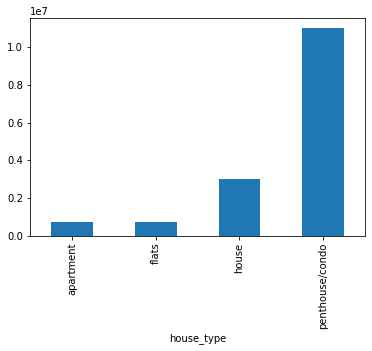

In [7]:
data.groupby('house_type')['price'].median().plot(kind = 'bar')

In [8]:
## working with rent duration columns

data.rent_duration.value_counts()

per annum      589
per quarter     84
per month        3
Name: rent_duration, dtype: int64

In [9]:
## convert all rent_duration to per annum by multiplying the price by 4 for quaterly and 12 for monthly
copy = data.copy()

data.price.loc[data.rent_duration == 'per quarter'] *= 4

data.price.loc[data.rent_duration == 'per month'] *= 12
data.price.head()

0     450000
1     300000
2     200000
3    4000000
4    1200000
Name: price, dtype: int64

In [10]:
data.condition.value_counts()

Newly Built    423
Fairly Used    218
Renovated       32
Old              3
Name: condition, dtype: int64

In [11]:
## change all values except for Newly Built to Faily Used

copy = pd.read_csv('C:/Users/EGBUNA/Jiji_web_data/jiji_house_data(cleaned).csv')
data.condition = copy.condition.copy()
data.condition = data.condition.apply(lambda x: 'Fairly Used' if x != 'Newly Built' else x)
data.condition.value_counts()

Newly Built    423
Fairly Used    253
Name: condition, dtype: int64

In [12]:
data.state.value_counts()

lagos          218
rivers         113
abuja           75
imo             69
enugu           56
none            55
anambra         41
oyo             11
ogun            10
cross river     10
kaduna           9
nasarawa         5
borno            1
osun             1
edo              1
bayelsa          1
Name: state, dtype: int64

In [13]:
## we'll rename the rare states others to reduce outliers
main_states = 'lagos,rivers,abuja,imo,enugu,anambra'.split(',')
data.state = data.state.apply(lambda x: 'rare' if x not in main_states else x)
data.state.value_counts()

lagos      218
rivers     113
rare       104
abuja       75
imo         69
enugu       56
anambra     41
Name: state, dtype: int64

In [14]:
data.rooms.value_counts()

4    167
3    135
5    129
2    122
1    120
7      2
6      1
Name: rooms, dtype: int64

In [15]:
## to remove the outlier we change 7 and 6 rooms to '5 and above' or just call it 5 so as not to change the data type
data.rooms = data.rooms.apply(lambda x: 5 if x > 4 else x)
data.rooms.value_counts()

4    167
3    135
5    132
2    122
1    120
Name: rooms, dtype: int64

<AxesSubplot:xlabel='rooms', ylabel='price'>

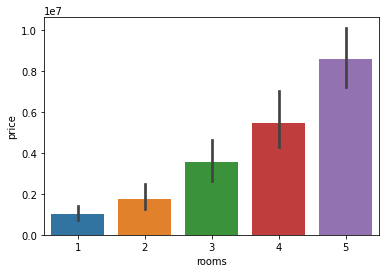

In [16]:
sns.barplot(data.rooms, data.price)

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

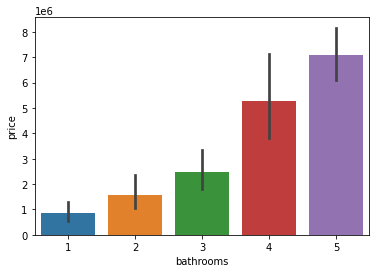

In [17]:
sns.barplot(data.bathrooms, data.price)

## Data encoding (converting cataegoricalvalues to numerical values)

In [18]:
## let's deal with columns that has just yes or no values or ordinal values
ordinal = [f for f in data.columns if data[f].nunique() == 2 and f != 'condition']

## loop through the ordinal list and then change the values

for column in ordinal:
    data[column] = data[column].apply(lambda x: 0 if x == 'no' else 1)
    print(data[column].value_counts())
    print('')

0    481
1    195
Name: dishwasher, dtype: int64

0    346
1    330
Name: prepaid_meter, dtype: int64

1    351
0    325
Name: dinning_area, dtype: int64

0    572
1    104
Name: air_conditioning, dtype: int64

0    465
1    211
Name: chandelier, dtype: int64

0    545
1    131
Name: estate, dtype: int64



In [19]:
## dealing with the condition column
data.condition = data.condition.map({'Fairly Used':0, 'Newly Built':1})
data.condition.value_counts()

1    423
0    253
Name: condition, dtype: int64

In [20]:
## dealing with the remaining columns
cat = [f for f in data.columns if f not in ordinal and data[f].dtype == 'object']
print(cat)

['location', 'house_type', 'rent_duration', 'estate name', 'furnishing', 'facilities', 'area', 'state']


<AxesSubplot:xlabel='house_type'>

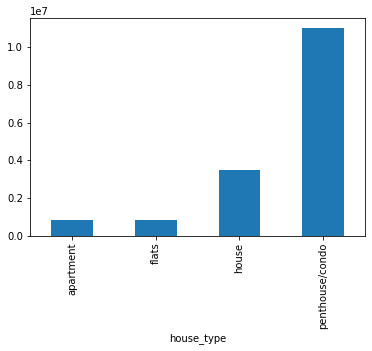

In [21]:
## house type
data.groupby('house_type')['price'].median().sort_values().plot(kind = 'bar')

In [22]:
## i'll encode it using the average price of each house_type because i am very confused now
##i.e penthouse/condo = 3, house = 2, flats = 1, appartments = 0

data.house_type = data.house_type.map({'penthouse/condo':3, 'house':2, 'flats': 1, 'apartment':0})
data.house_type.value_counts()

2    334
0    190
1    148
3      4
Name: house_type, dtype: int64

In [23]:
## encoding the area the house is located in 

data.area = data.area.map({'urban':3, 'semi_urban':2, 'rural': 1})
data.area.value_counts()

1    294
2    243
3    139
Name: area, dtype: int64

In [24]:
## furnishing
data.furnishing.value_counts()

Semi-Furnished    248
Unfurnished       226
Furnished         202
Name: furnishing, dtype: int64

In [25]:
## creating a function for furnishing column
def furnish_encode(x):
    if x == 'Unfurnished':
        return 0
    elif x == 'Semi-Furnished':
        return 1
    else:
        return 2

#data.furnishing.apply(furnish_encode())
data.furnishing = [furnish_encode(f) for f in data.furnishing]

In [26]:
data.furnishing.value_counts()

1    248
0    226
2    202
Name: furnishing, dtype: int64

<AxesSubplot:xlabel='state'>

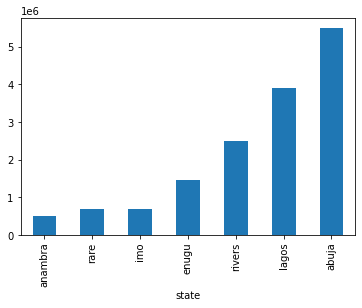

In [27]:
data.groupby('state')['price'].median().sort_values().plot(kind = 'bar')

In [28]:
## i'll use the average price of a a house to in a state to encode this data
## i.e rare = 0, anambra =1, imo = 2, enugu = 3, rivers = 4, lagos = 5, abuja = 6
## using map function for substitution of values

data.state = data.state.map({'abuja':6, 'lagos':5, 'rivers':4, 'enugu':3, 'imo':2, 'anambra':1, 'rare':0})


In [29]:
data.state.value_counts()

5    218
4    113
0    104
6     75
2     69
3     56
1     41
Name: state, dtype: int64

## Dropping all unwanted columns in the data

In [30]:
## dropping unwanted columns from my data

data.drop(['estate name', 'facilities', 'location','rent_duration',], axis = 1, inplace =True)

In [31]:
data.columns

Index(['price', 'house_type', 'rooms', 'bathrooms', 'condition', 'furnishing',
       'area', 'dishwasher', 'prepaid_meter', 'dinning_area',
       'air_conditioning', 'chandelier', 'state', 'estate'],
      dtype='object')

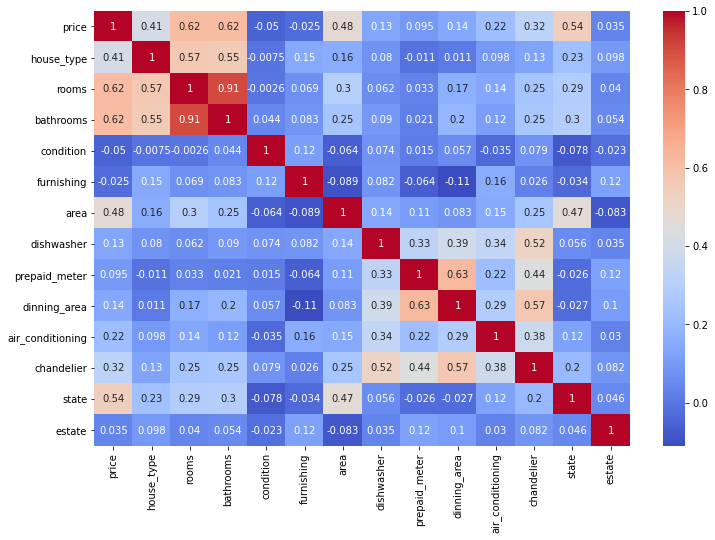

In [45]:
## checking data correlation to see how far i've come
corr = data.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.show()

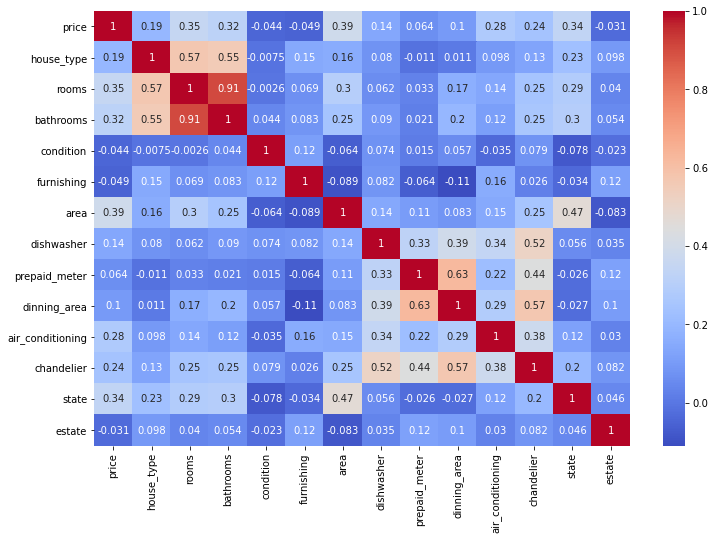

In [32]:
## checking data correlation to see how far i've come
corr = data.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.show()

In [33]:
data.condition.unique()

array([1, 0], dtype=int64)

## Log transforming all columns to make a perfect guassian/normal distribution

In [34]:
## apply log transform to price column to reduce the skewneess
data.price = np.log(data.price)
data.head()

,price,house_type,rooms,bathrooms,condition,furnishing,area,dishwasher,prepaid_meter,dinning_area,air_conditioning,chandelier,state,estate
0,13.017003,0,1,2,1,2,2,1,1,1,0,1,3,0
1,12.611538,0,1,2,1,0,1,0,0,1,0,0,1,0
2,12.206073,0,1,1,0,0,1,1,1,0,0,0,0,0
3,15.201805,2,1,2,1,1,2,1,1,1,0,1,5,0
4,13.997832,0,1,2,0,0,1,0,0,1,0,0,5,0


In [35]:
x_vals = [f for f in data.columns if f != 'price']
data[x_vals]

,house_type,rooms,bathrooms,condition,furnishing,area,dishwasher,prepaid_meter,dinning_area,air_conditioning,chandelier,state,estate
0,0,1,2,1,2,2,1,1,1,0,1,3,0
1,0,1,2,1,0,1,0,0,1,0,0,1,0
2,0,1,1,0,0,1,1,1,0,0,0,0,0
3,2,1,2,1,1,2,1,1,1,0,1,5,0
4,0,1,2,0,0,1,0,0,1,0,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,2,4,5,0,1,1,0,1,1,0,1,4,0
672,2,4,5,1,1,1,0,1,1,0,0,4,0
673,2,4,4,1,1,1,0,1,1,0,0,4,0
674,2,4,5,1,1,1,0,1,1,0,0,4,1


## scaling my data using Standard Scaler

In [36]:
from sklearn.preprocessing import StandardScaler as ss

In [37]:
scaler = ss()

In [38]:
x = scaler.fit_transform(data[x_vals])

In [39]:
new_data = pd.DataFrame(x, columns = x_vals)

In [40]:
new_data.head()
new_data['price'] = data.price.copy()

In [44]:
data.to_csv('C:/Users/EGBUNA/Jiji_web_data/jiji_house_data(engineered).csv', index =False)